<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


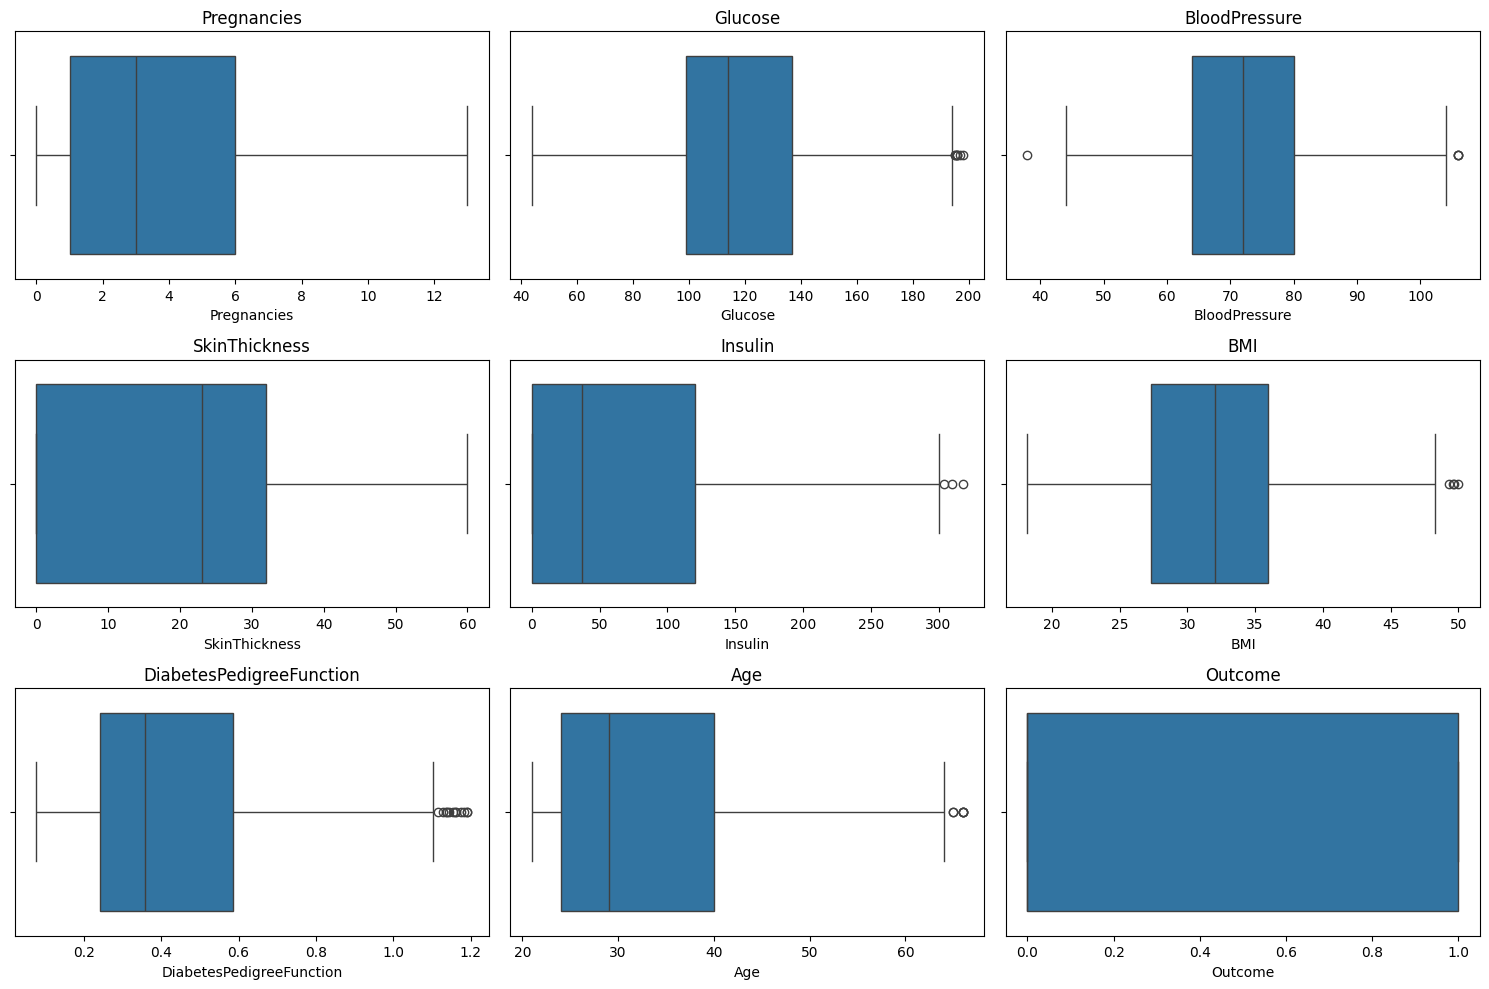

In [8]:
# prompt: Using dataframe df: can you outliers in through box plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [6]:
# prompt: Using dataframe df: identify and delete outlier

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Remove outliers
df = df[~outliers]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


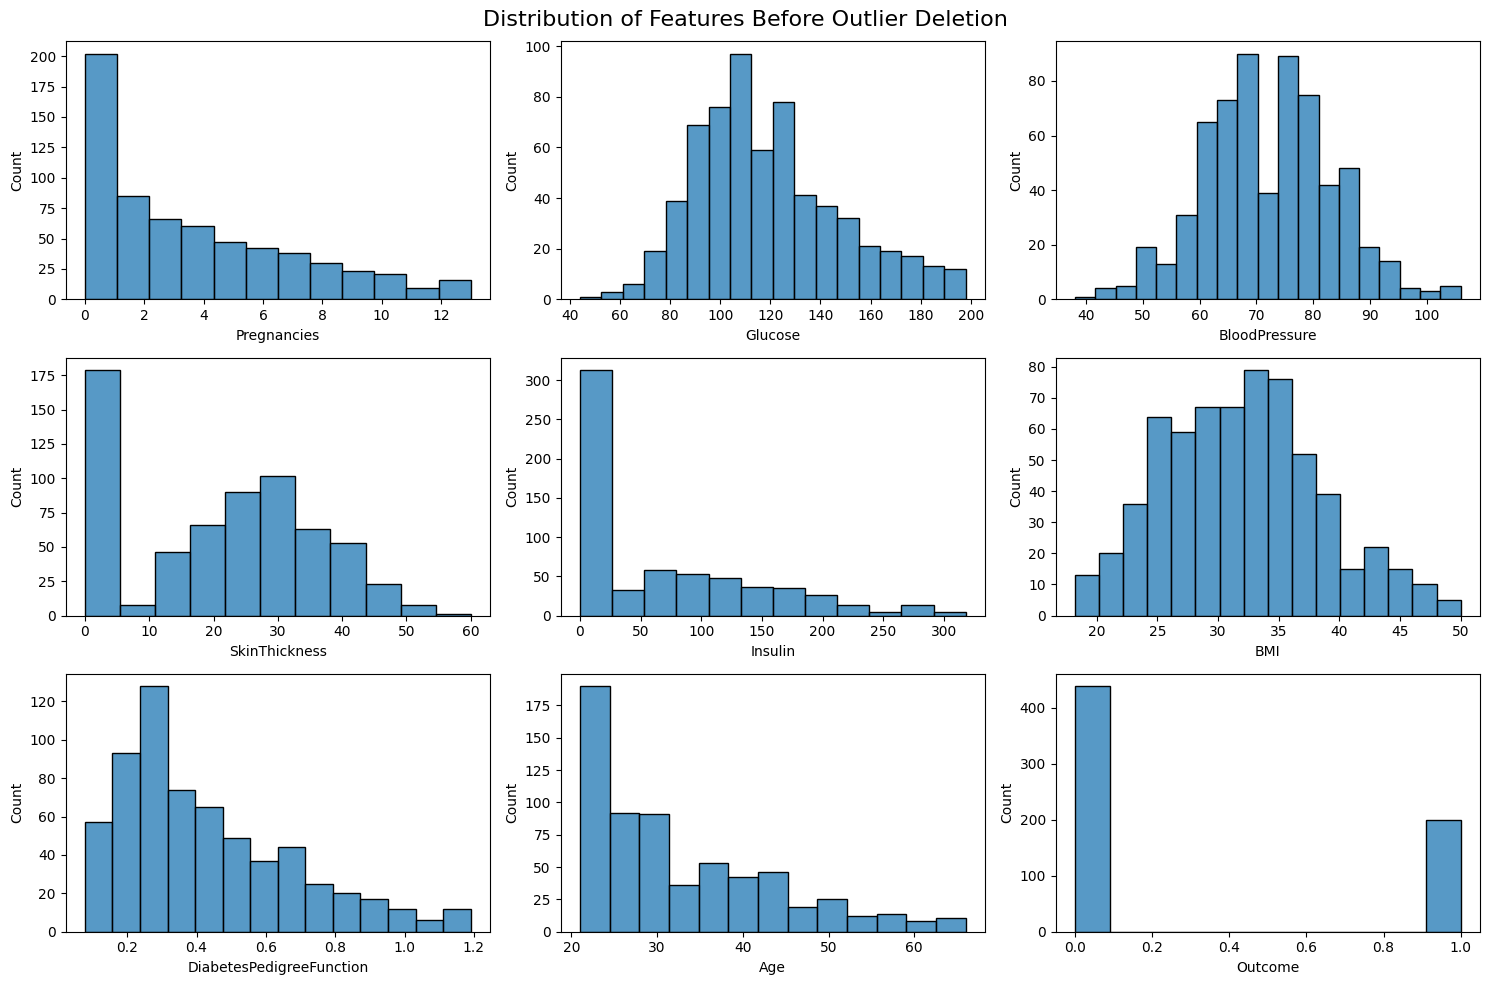

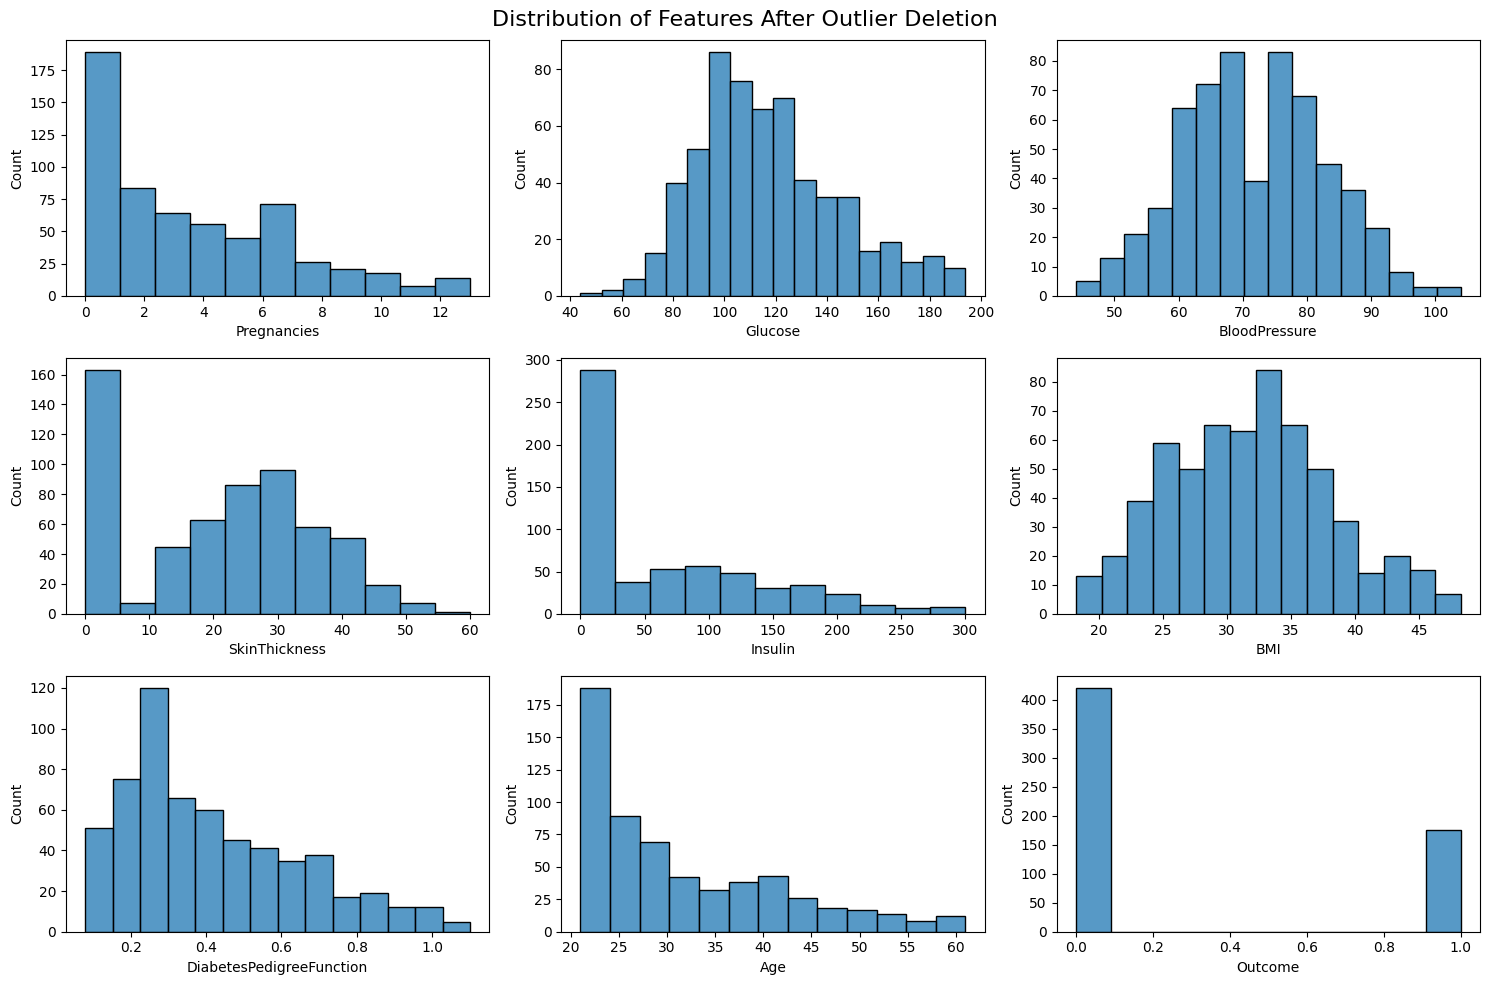

In [10]:
# prompt: Using dataframe df: show graphs before and after outlier deletion

import matplotlib.pyplot as plt
import seaborn as sns

# Before outlier deletion
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Features Before Outlier Deletion', fontsize=16)

# Plot histograms for each feature
sns.histplot(df['Pregnancies'], ax=axes[0, 0])
sns.histplot(df['Glucose'], ax=axes[0, 1])
sns.histplot(df['BloodPressure'], ax=axes[0, 2])
sns.histplot(df['SkinThickness'], ax=axes[1, 0])
sns.histplot(df['Insulin'], ax=axes[1, 1])
sns.histplot(df['BMI'], ax=axes[1, 2])
sns.histplot(df['DiabetesPedigreeFunction'], ax=axes[2, 0])
sns.histplot(df['Age'], ax=axes[2, 1])
sns.histplot(df['Outcome'], ax=axes[2, 2])

plt.tight_layout()
plt.show()

# After outlier deletion
# Define a function to identify and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply the function to each numerical column
for column in df.select_dtypes(include=['number']).columns:
    df = remove_outliers_iqr(df, column)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Features After Outlier Deletion', fontsize=16)

# Plot histograms for each feature
sns.histplot(df['Pregnancies'], ax=axes[0, 0])
sns.histplot(df['Glucose'], ax=axes[0, 1])
sns.histplot(df['BloodPressure'], ax=axes[0, 2])
sns.histplot(df['SkinThickness'], ax=axes[1, 0])
sns.histplot(df['Insulin'], ax=axes[1, 1])
sns.histplot(df['BMI'], ax=axes[1, 2])
sns.histplot(df['DiabetesPedigreeFunction'], ax=axes[2, 0])
sns.histplot(df['Age'], ax=axes[2, 1])
sns.histplot(df['Outcome'], ax=axes[2, 2])

plt.tight_layout()
plt.show()


In [11]:
df.skew()

,0
Pregnancies,0.878087
Glucose,0.592079
BloodPressure,0.094618
SkinThickness,-0.086794
Insulin,0.961954
BMI,0.225256
DiabetesPedigreeFunction,0.810562
Age,0.964155
Outcome,0.899713


In [12]:
X=df.iloc[:,:8]

In [13]:
y=df.Outcome

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [16]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
311,0,106,70,37,148,39.4,0.605,22
632,2,111,60,0,0,26.2,0.343,23
609,1,111,62,13,182,24.0,0.138,23
234,3,74,68,28,45,29.7,0.293,23
735,4,95,60,32,0,35.4,0.284,28


In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.feature_selection import SelectKBest,chi2

In [21]:
from sklearn.pipeline import Pipeline,make_pipeline

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 311 to 725
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               476 non-null    int64  
 1   Glucose                   476 non-null    int64  
 2   BloodPressure             476 non-null    int64  
 3   SkinThickness             476 non-null    int64  
 4   Insulin                   476 non-null    int64  
 5   BMI                       476 non-null    float64
 6   DiabetesPedigreeFunction  476 non-null    float64
 7   Age                       476 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 33.5 KB


In [29]:
tr01=ColumnTransformer([("scaler",MinMaxScaler(),slice(0,8))],remainder="passthrough")

In [25]:
tr02=SelectKBest(score_func=chi2,k=8)

In [26]:
tr03=DecisionTreeClassifier(max_depth=3)

In [30]:
pipe=Pipeline([("tr01",tr01),("tr02",tr02),("tr03",tr03)])

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('tr02',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x79b41ea80b80>)),
                ('tr03', DecisionTreeClassifier(max_depth=3))])

In [32]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tr01',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x00000142DFE43880>)),
                ('tr03', DecisionTreeClassifier())])

In [33]:
accuracy_score(y_test,pipe.predict(X_test))

0.7833333333333333

[Text(0.5769230769230769, 0.875, 'x[1] <= 0.714\ngini = 0.424\nsamples = 476\nvalue = [331, 145]'),
 Text(0.3076923076923077, 0.625, 'x[7] <= 0.237\ngini = 0.356\nsamples = 418\nvalue = [321, 97]'),
 Text(0.15384615384615385, 0.375, 'x[5] <= 0.424\ngini = 0.223\nsamples = 258\nvalue = [225, 33]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.088\nsamples = 130\nvalue = [124, 6]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.333\nsamples = 128\nvalue = [101, 27]'),
 Text(0.46153846153846156, 0.375, 'x[5] <= 0.306\ngini = 0.48\nsamples = 160\nvalue = [96, 64]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.5\nsamples = 127\nvalue = [65, 62]'),
 Text(0.8461538461538461, 0.625, 'x[3] <= 0.708\ngini = 0.285\nsamples = 58\nvalue = [10, 48]'),
 Text(0.7692307692307693, 0.375, 'x[6] <= 0.245\ngini = 0.245\nsamples = 56\nvalue = [8, 48]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'

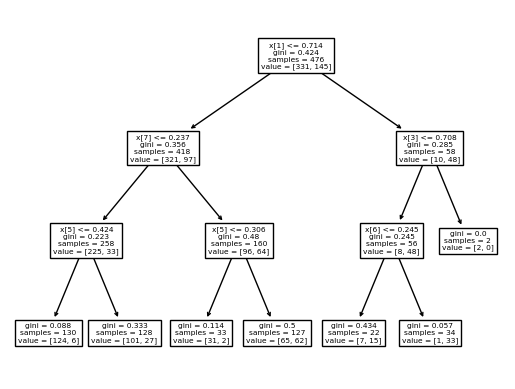

In [40]:
from sklearn import tree # import the tree module from sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

tree.plot_tree(pipe.named_steps["tr03"]) # call plot_tree from the tree module

In [39]:
import matplotlib.pyplot as plt

In [42]:
paramets={"tr03__max_depth":[3,4,5],"tr03__min_samples_split":[2,3,4,None],"tr03__criterion":["gini","entropy"]}

In [43]:
grid=GridSearchCV(estimator=pipe,param_grid=paramets,cv=5,scoring="accuracy")

In [44]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tr01',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         slice(0, 8, None))])),
                                       ('tr02',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x79b41ea80b80>)),
                                       ('tr03',
                                        DecisionTreeClassifier(max_depth=3))]),
             param_grid={'tr03__criterion': ['gini', 'entropy'],
                         'tr03__max_depth': [3, 4, 5],
                         'tr03__min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [45]:
grid.best_score_

0.7520833333333333

In [46]:
grid.best_params_

{'tr03__criterion': 'gini', 'tr03__max_depth': 4, 'tr03__min_samples_split': 4}

[Text(0.6041666666666666, 0.9, 'x[1] <= 0.714\ngini = 0.424\nsamples = 476\nvalue = [331, 145]'),
 Text(0.3333333333333333, 0.7, 'x[7] <= 0.237\ngini = 0.356\nsamples = 418\nvalue = [321, 97]'),
 Text(0.16666666666666666, 0.5, 'x[5] <= 0.424\ngini = 0.223\nsamples = 258\nvalue = [225, 33]'),
 Text(0.08333333333333333, 0.3, 'x[0] <= 0.5\ngini = 0.088\nsamples = 130\nvalue = [124, 6]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.075\nsamples = 129\nvalue = [124, 5]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3, 'x[6] <= 0.416\ngini = 0.333\nsamples = 128\nvalue = [101, 27]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.198\nsamples = 81\nvalue = [72, 9]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.473\nsamples = 47\nvalue = [29, 18]'),
 Text(0.5, 0.5, 'x[5] <= 0.306\ngini = 0.48\nsamples = 160\nvalue = [96, 64]'),
 Text(0.4166666666666667, 0.3, 'x[7] <= 0.963\ngini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(0.375, 0.1, 'gini = 0.061\nsamples = 32\nval

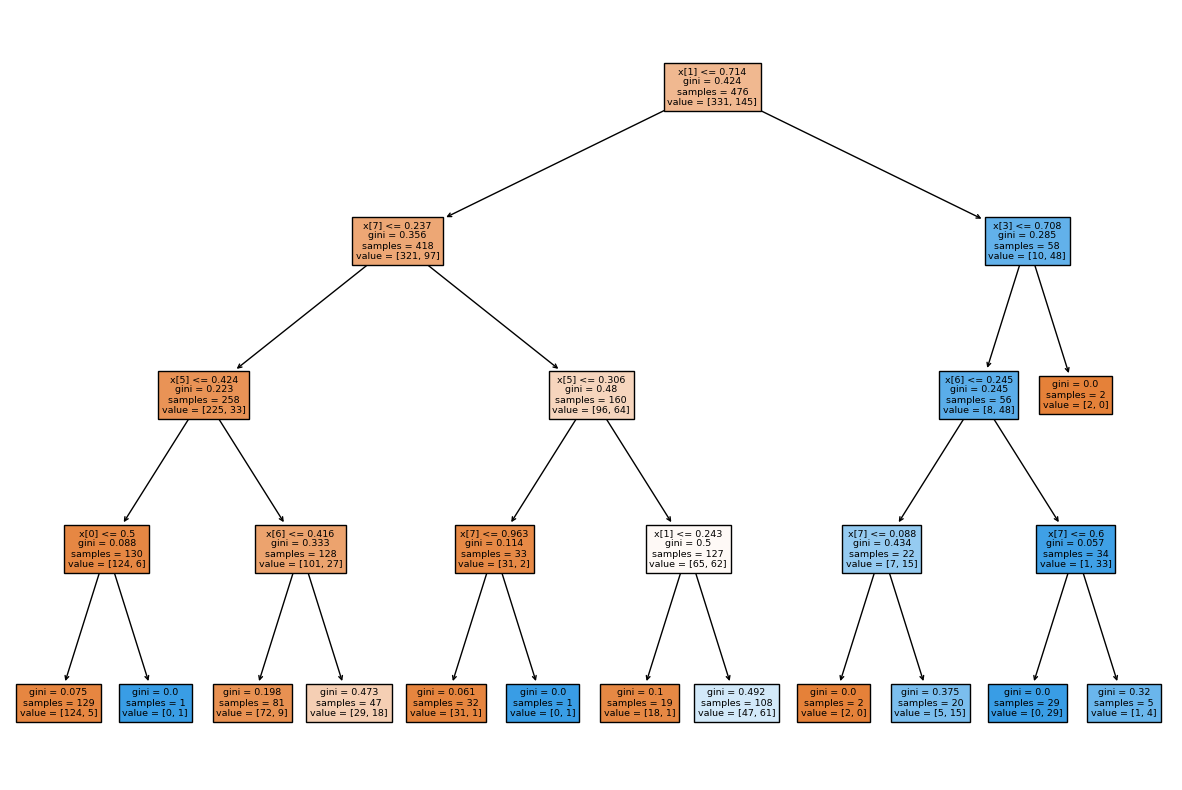

In [50]:
plt.figure(figsize=(15,10))
tree.plot_tree(grid.best_estimator_.named_steps["tr03"],filled=True)

In [51]:
cross_val_score(pipe,X_train,y_train,cv=5,scoring="accuracy").mean()

0.7331578947368421

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_predict)

0.7077922077922078

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(pipe,X_train,y_train,cv=5,scoring="accuracy").mean()

0.6645208583233374

In [ ]:
pipe.named_steps

{'tr01': ColumnTransformer(transformers=[('scaler', MinMaxScaler(), slice(0, 7, None))]),
 'tr02': SelectKBest(k=5, score_func=<function chi2 at 0x00000142DFE43880>),
 'tr03': DecisionTreeClassifier()}

In [ ]:
pipe.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('tr01',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('tr02',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x00000142DFE43880>)),
                ('tr03', DecisionTreeClassifier())])>

In [ ]:
pipe.n_features_in_

8

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={"tr03__criterion":["entropy"],"tr03__max_depth":[None,1,2,3,4,5,6,7,8,10],"tr03__min_samples_split":[2,5,10]}

In [ ]:
gird=GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring="accuracy")

In [ ]:
gird.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tr01',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         slice(0, 7, None))])),
                                       ('tr02',
                                        SelectKBest(k=5,
                                                    score_func=<function chi2 at 0x00000142DFE43880>)),
                                       ('tr03', DecisionTreeClassifier())]),
             param_grid={'tr03__criterion': ['entropy'],
                         'tr03__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'tr03__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
gird.best_score_

0.7280554444888712

In [ ]:
gird.best_params_

{'tr03__criterion': 'entropy',
 'tr03__max_depth': 3,
 'tr03__min_samples_split': 2}

In [ ]:
gird.cv

5

In [ ]:
gird.best_index_

9

In [ ]:
gird.error_score

nan

In [ ]:
df01.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
df01=pd.read_csv("/content/HR-Employee-Attrition.csv")

In [53]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [57]:
df01.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [58]:
df01.drop(columns=["Department","EducationField","EmployeeCount","EmployeeNumber","Gender","NumCompaniesWorked"])

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,2,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,2,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,6,1,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,4,3,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,2,3,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [59]:

# Corrected list of important features to keep
important_features = [
    'OverTime',
    'JobSatisfaction',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'BusinessTravel',
    'EnvironmentSatisfaction',
    'MaritalStatus',
    'MonthlyIncome'
]

# Drop columns that are not in the list of important features
df02 = df01[important_features]


In [60]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   OverTime                 1470 non-null   object
 1   JobSatisfaction          1470 non-null   int64 
 2   WorkLifeBalance          1470 non-null   int64 
 3   YearsAtCompany           1470 non-null   int64 
 4   YearsInCurrentRole       1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   MaritalStatus            1470 non-null   object
 8   MonthlyIncome            1470 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 103.5+ KB


In [61]:
X=df02

In [62]:
y=df01.Attrition

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_train.head(2)

,OverTime,JobSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,BusinessTravel,EnvironmentSatisfaction,MaritalStatus,MonthlyIncome
1097,No,1,3,1,1,Travel_Rarely,3,Divorced,2296
727,No,4,3,0,0,Non-Travel,2,Single,1051


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
X.head(2)

,OverTime,JobSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,BusinessTravel,EnvironmentSatisfaction,MaritalStatus,MonthlyIncome
0,Yes,4,1,6,4,Travel_Rarely,2,Single,5993
1,No,2,3,10,7,Travel_Frequently,3,Married,5130


In [67]:
tr01=ColumnTransformer(
    [("ohe",OrdinalEncoder(categories=[['No', 'Yes'],['Non-Travel','Travel_Rarely','Travel_Frequently']]),[0,5])],
    remainder="passthrough")

In [68]:
tr02=ColumnTransformer(
    [("ohe2",OneHotEncoder(sparse_output=False,drop="first"),[7])],remainder="passthrough")

In [69]:
tr03=ColumnTransformer([("scaler",MinMaxScaler(),[1,2,3,4,6,8])],remainder="passthrough")

In [70]:
tr04=SelectKBest(score_func=chi2,k=8)

In [73]:
tr05=RandomForestClassifier()

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le=LabelEncoder()

In [76]:
y_train_tranformed=le.fit_transform(y_train)
y_test_tranformed=le.transform(y_test)

In [77]:
pipe=Pipeline([("tr01",tr01),("tr02",tr02),("tr03",tr03),("tr04",tr04),("tr05",tr05)])

In [78]:
pipe.fit(X_train,y_train_tranformed)

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['Non-Travel',
                                                                              'Travel_Rarely',
                                                                              'Travel_Frequently']]),
                                                  [0, 5])])),
                ('tr02',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [7])])),
                ('tr03',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  [1, 2, 3, 4, 6, 8])])),
                ('tr04',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x79b41ea80b80>)),
                ('tr05', RandomForestClassifier())])

In [86]:
y_predict=pipe.predict(X_test)

In [ ]:
accuracy_score(y_test_tranformed,y_predict)

0.8299319727891157

In [79]:
param_grid = {
    "tr05__n_estimators": [100, 200, 300],
    "tr05__max_depth": [None, 10, 20, 30],
    "tr05__min_samples_split": [2, 5, 10],
    "tr05__criterion": ["gini", "entropy"],"tr04__k":[1,2,3,4,5,6,7,8]
}

In [80]:
gird02=GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring="accuracy")

In [ ]:
gird02.fit(X_train,y_train_tranformed)

In [82]:
gird02.best_estimator_

Pipeline(steps=[('tr01',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['Non-Travel',
                                                                              'Travel_Rarely',
                                                                              'Travel_Frequently']]),
                                                  [0, 5])])),
                ('tr02',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [7])])),
                ('tr03',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  [1, 2, 3, 4, 6, 8])])),
                ('tr04',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x79b41ea80b80>)),
                ('tr05',
                 RandomForestClassifier(max_depth=10, min_samples_split=5))])

In [83]:
gird02.best_score_

0.8571330688784711

array(['OverTime', 'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'BusinessTravel', 'EnvironmentSatisfaction',
       'MaritalStatus', 'MonthlyIncome'], dtype=object)

In [84]:
gird02.best_params_

{'tr04__k': 5,
 'tr05__criterion': 'gini',
 'tr05__max_depth': 10,
 'tr05__min_samples_split': 5,
 'tr05__n_estimators': 100}

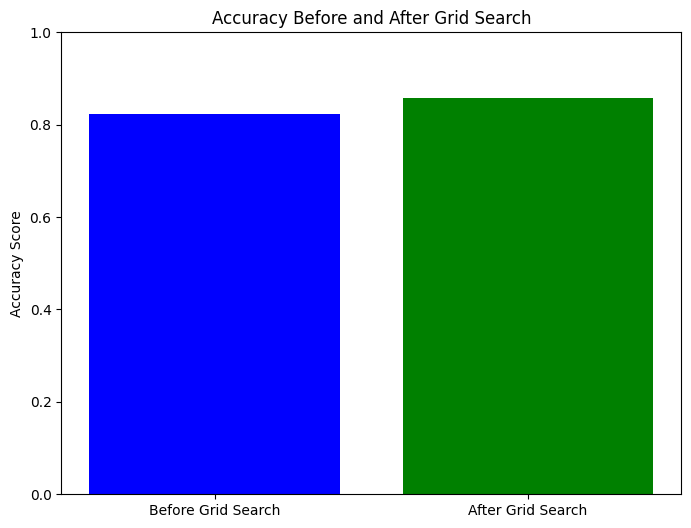

In [87]:
# prompt: plot graph showing socre before and after grid search

import matplotlib.pyplot as plt

# Assuming you have the following variables:
# - accuracy_score before grid search (e.g., initial_accuracy)
# - gird02.best_score_ (the best score after grid search)

# Create data for the plot
scores = [accuracy_score(y_test_tranformed, y_predict), gird02.best_score_]
labels = ['Before Grid Search', 'After Grid Search']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Accuracy Score')
plt.title('Accuracy Before and After Grid Search')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()
